In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/nuclearkatie/cyclus/mummah_cvt/helpmetric"))
import mytool as mt
import numpy as np

In [2]:
cut = [0.5, 0.5, 0.5]

mt.calc_feed_flows(3, 0, 1, cut)

array([1.5, 1. , 0.5])

In [3]:
#Case 1 no recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.336813209666015
3.2290895478933574
0.3912989227633823
0.042798319677244935


In [4]:
#Case 2 no recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872, 0.547009]

flow = mt.calc_feed_flows(5, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
25.786172491400155
3.3506205497807513
0.5953773288801222
0.1896982374740563
0.07813139246491452


In [5]:
#Case 1 recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v]


flow = mt.calc_feed_flows(3, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.444921316165956
3.204577968526467
0.3505007153075823


In [6]:
#Case 2 recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872]



flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.047225431064682
3.315665416640822
0.5240703271501721
0.11303882514432921


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)
/Users/nuclearkatie/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


Text(0.5,1,'Material production rates')

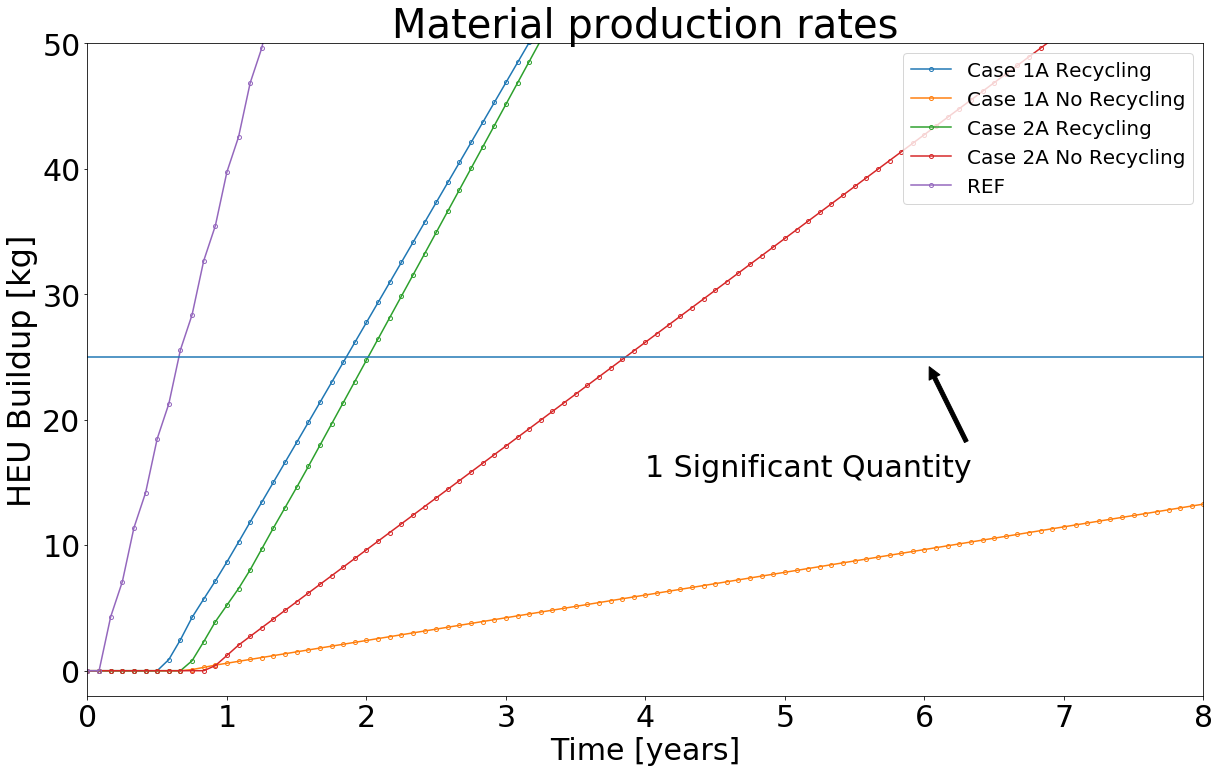

In [7]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/nuclearkatie/cyclus/mummah_cvt/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

files = ['cascade_case_2_S2_25_4_1.sqlite',
         'cascade_case_2_no_rec_S3_24_4_1_1.sqlite',
         'cascade_case_3_S3_24_4_1_1.sqlite',
         'cascade_case_3_no_rec_S4_23_4_1_1_1.sqlite',
         'cascade_case_1.sqlite']
invs = ['storage_2',
        'storage_3',
        'storage_3',
        'storage_4',
        'storage']

c_names = ['Case 1A Recycling','Case 1A No Recycling','Case 2A Recycling','Case 2A No Recycling','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time [y]", "HEU Buildup [kg]" ,mk='.',mk_z=8,loc=1)
plt.axhline(y=25)
plt.ylim((-2, 50))
plt.xlim((0,8))
plt.annotate('1 Significant Quantity', xy=(6, 25), xytext=(4, 15.5),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)
plt.title('Material production rates',fontsize=40)

#x = np.arange(0, 16, 1);
#plt.savefig("HEU_prod.png")

### plt_LEU_qty_case_2_x[4]

In [8]:
sender = [['cascade_0'], 
             ['cascade_1'], 
             ['cascade_2'], 
             ['cascade_3'], 
             ['cascade_4'], 
             ['cascade_5']]
receivers = [['storage_0'], 
          ['storage_1'], 
          ['storage_2'], 
          ['storage_3'], 
          ['storage_4'],
            ['storage_5']]
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6

c_names = ['Level 0',
           'Level 1',
           'Level 2',
           'Level 3',
           'Level 4',
           'Level 5']
labels = ['Cascade0',
          'Cascade0rec',
          'Cascade1',
          'Cascade2',
          'Cascade3',
          'Cascade4',
          'Cascade5']
print('done')

done


level 0
level 1
level 2
completed


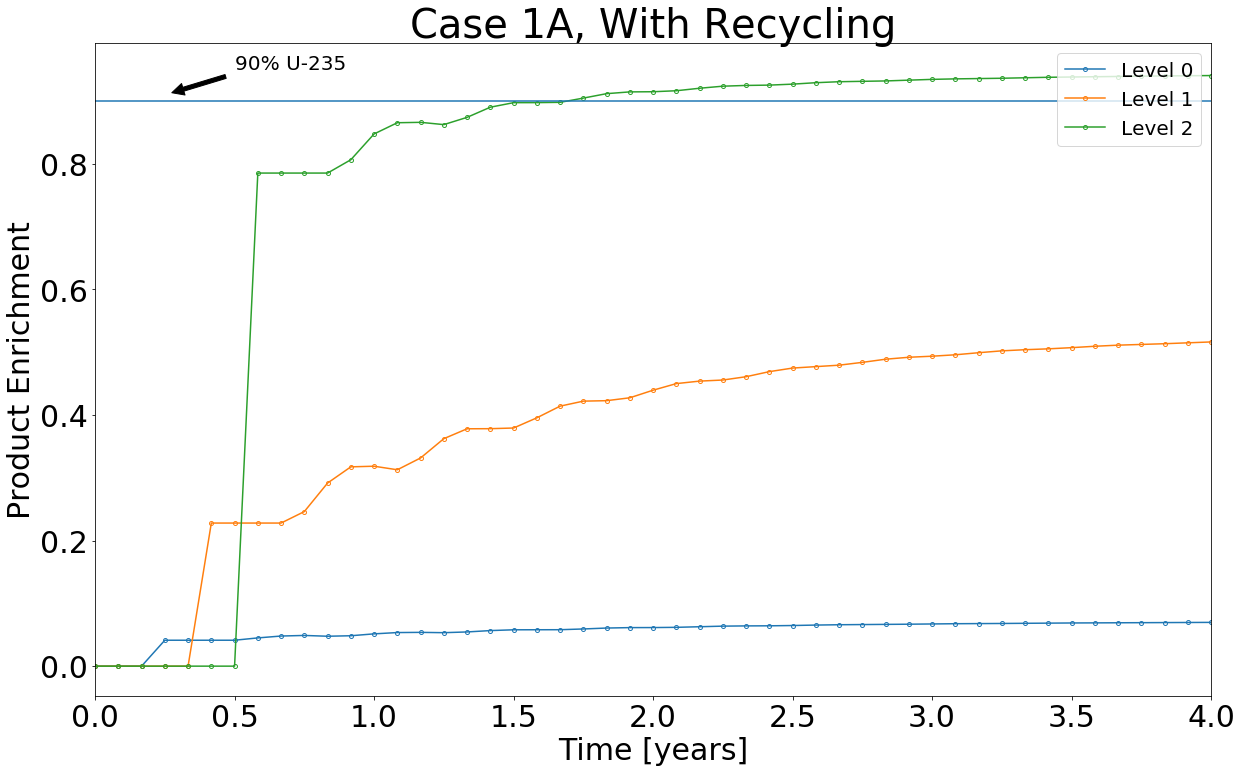

In [9]:
file = 'cascade_case_2_S2_25_4_1.sqlite'


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(3):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    print('level ' + str(i))
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment" ,mk='.',mk_z=8,loc='lower right')
plt.axhline(y=0.9)
plt.xlim(0,4)
plt.title('Case 1A, With Recycling',fontsize=40)
plt.annotate('90% U-235', xy=(.25, .91), xytext=(.5, .95),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20
            )

plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)
plt.ylabel('Product Enrichment',fontsize=30)

print('completed')

level 0
level 1
level 2
level 3
completed


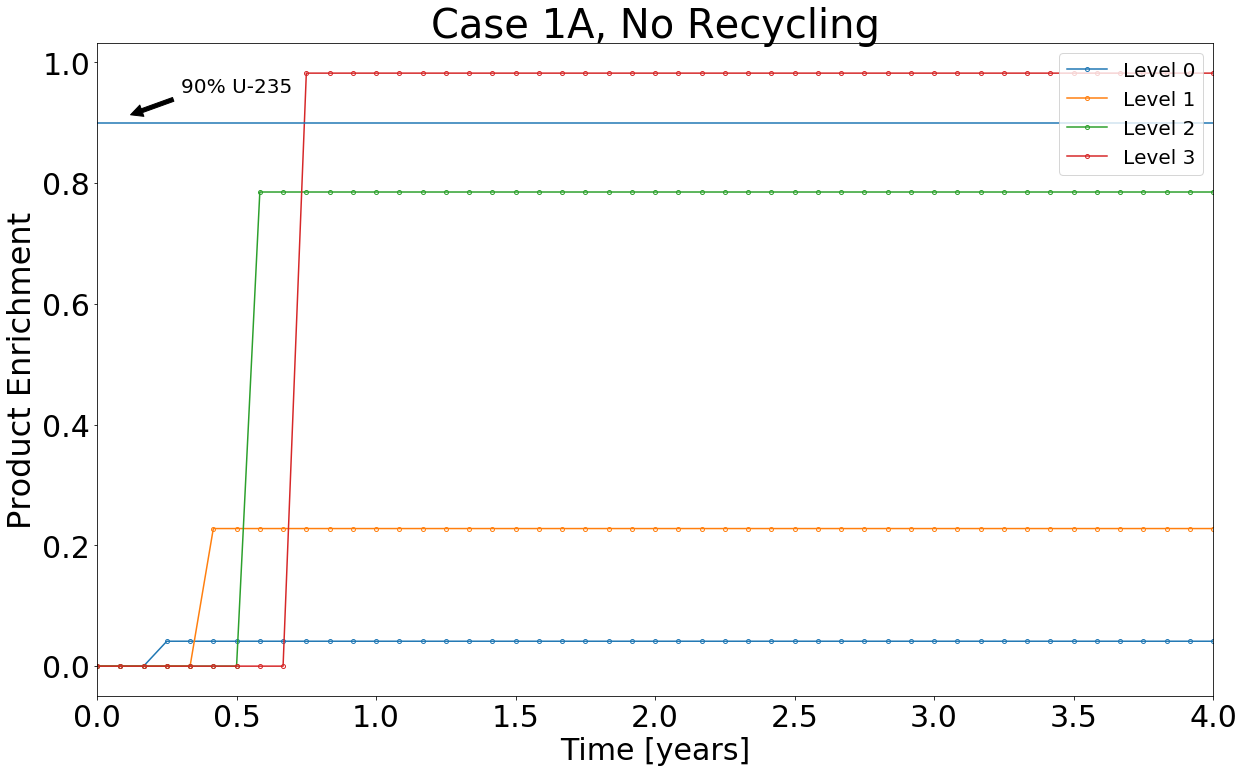

In [10]:
file = files[1]


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    print('level ' + str(i))
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment" ,mk='.',mk_z=8,loc='lower right')
plt.axhline(y=0.9)
plt.xlim(0,4)
plt.title('Case 1A, No Recycling',fontsize=40)
plt.annotate('90% U-235', xy=(.1, .91), xytext=(.3, .95),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20
            )

plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)


print('completed')

level 0
level 1
level 2
level 3
completed


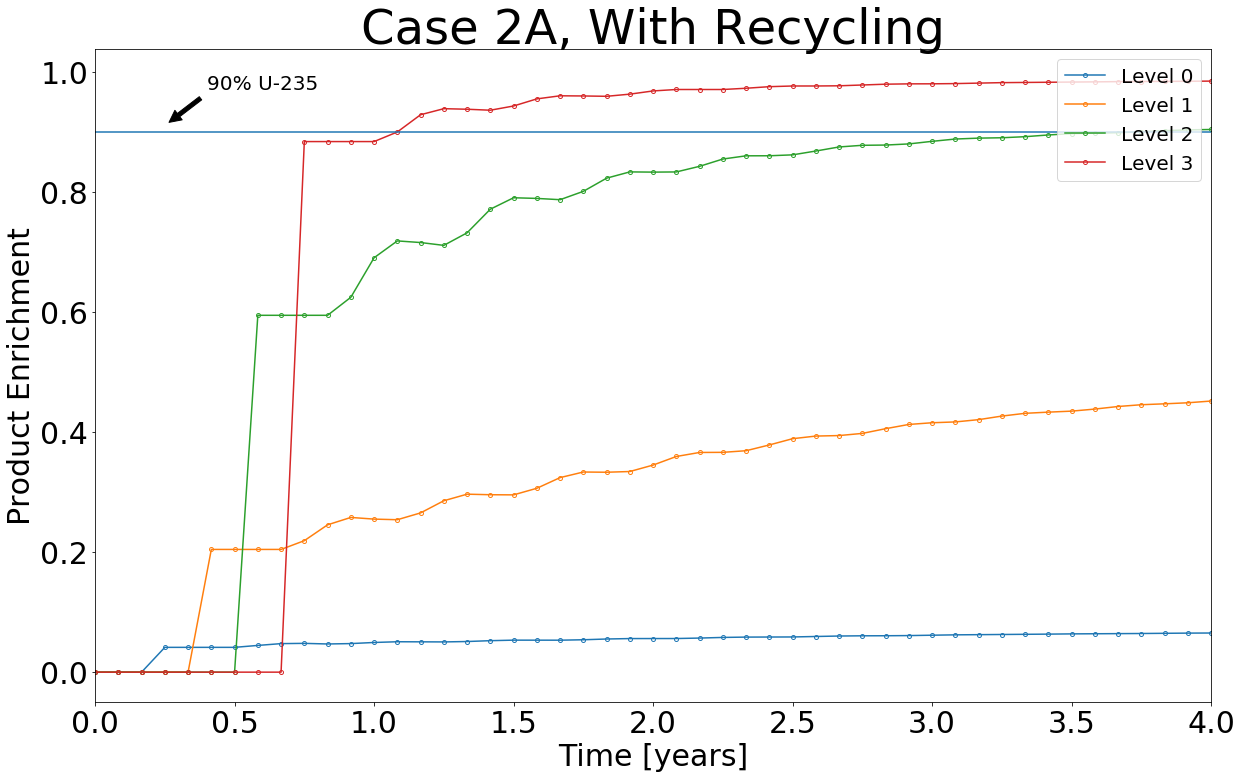

In [11]:
file = files[2]


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    print('level ' + str(i))
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment" , mk='.',mk_z=8,loc='lower right')
plt.axhline(y=0.9)
plt.xlim(0,4)
plt.title('Case 2A, With Recycling',fontsize=40)
#plt.annotate('90% U-235', xy=(.25, .91), xytext=(.5, .95),
#            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20
#            )

plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)

plt.title('Case 2A, With Recycling',fontsize=48)
plt.annotate('90% U-235', xy=(.25, .91), xytext=(.4, .97),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20
            )

plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)
plt.ylabel('Product Enrichment',fontsize=30)


print('completed')


done 0
done 1
done 2
done 3
done 4
done done


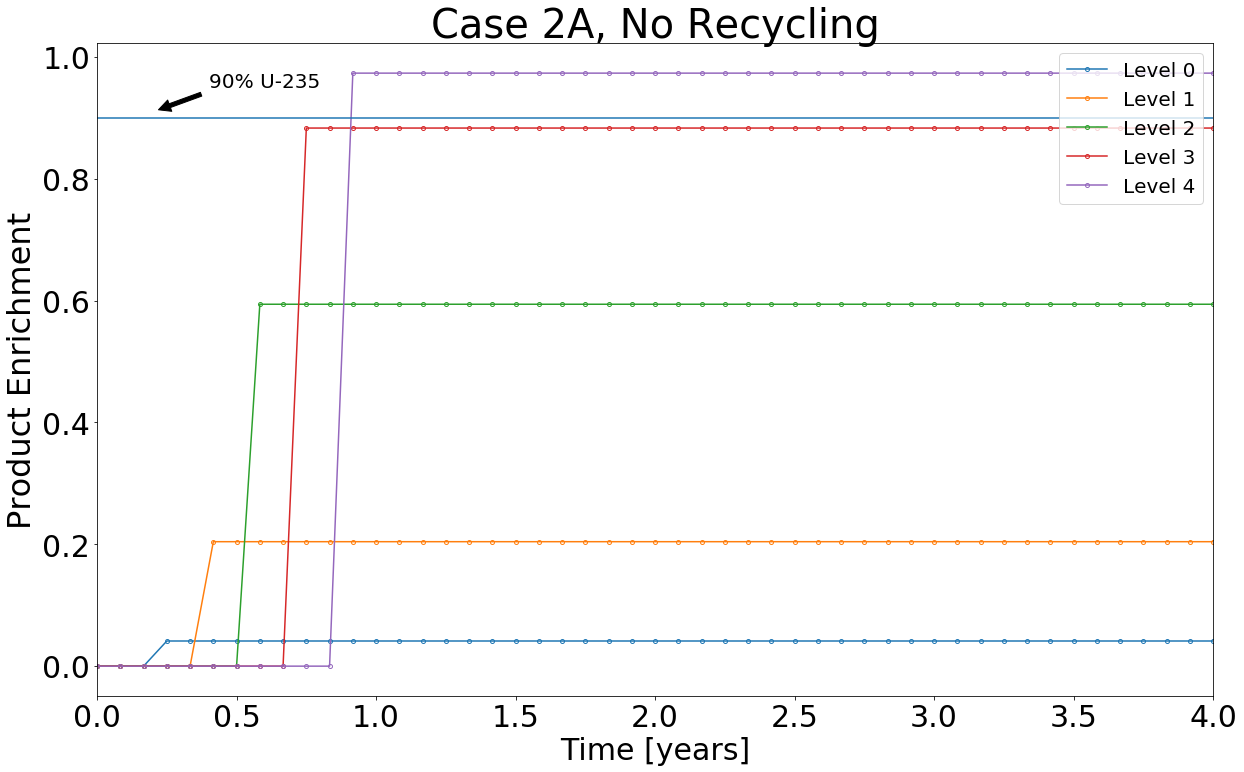

In [12]:
file = "cascade_case_3_no_rec_S4_23_4_1_1_1.sqlite"


feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(5):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time [y]", c_names[i])
    df_['Time [y]'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    print('done ' + str(i))
    
pdh.MakePlot(plt_feed_case_2, "Time [y]", "Product Enrichment" , mk='.',mk_z=8,loc='lower right')
plt.axhline(y=0.9)
plt.xlim(0,4)
plt.title('Case 2A, No Recycling',fontsize=40)
plt.annotate('90% U-235', xy=(.2, .91), xytext=(.4, .95),
            arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20
            )

plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Time [years]',fontsize=30)
#plt.savefig("assay_case_2_no_rec.png")

print('done done')

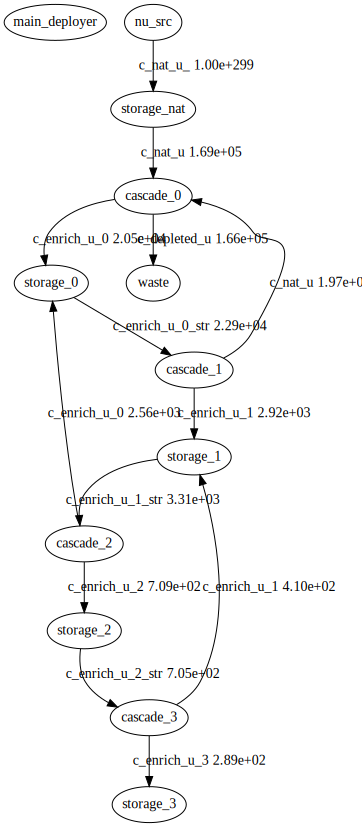

In [13]:
from cymetric import graphs as cgr
file = cym.dbopen(files[2])
ev = cym.Evaluator(db=file, write=False)
cgr.flow_graph(ev)